In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from picc import PICClustering

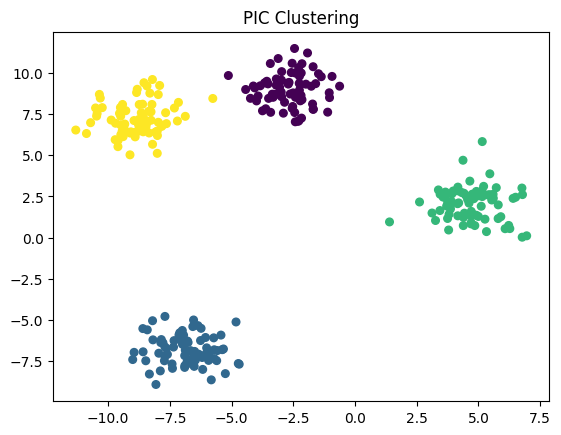

In [2]:
# Generate synthetic data.
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
pic = PICClustering(n_clusters=4, k=10, a=0.95, z=0.01)
labels = pic.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.title("PIC Clustering")
plt.show()